# Principles Of Data Mining and Machine Learning MOD007892 
## Assessment Element 010 Task 2 : Data Science Mega Case Study


# Analysis of Diabetic Patient Data 

This dataset is originally from the **National Institute of Diabetes and Digestive and Kidney Diseases.** The dataset consist of several medical predictor **(independent)** variables and one target **(dependent)** variable, Outcome. 

Independent variables include:

- Number of times pregnant.
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- Diastolic blood pressure (mm Hg).
- Triceps skinfold thickness (mm).
- Two-Hour serum insulin (mu U/ml).
- Body mass index (weight in kg/(height in m)^2).
- Diabetes pedigree function.
- Age (years).
- Outcome: Class variable (0 or 1).


#### Upload the provided dataset (diabetes.csv) into your Jupyter Notebook working directory.

In [226]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [227]:
df = pd.read_csv("diabetes.csv")

In [228]:
# Let's look at the first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 1. Total number of records 

In [229]:
count = df.index
no_of_records = len(count)
print('Total number of records:',no_of_records)

print('\nThe details of the Dataframe are as :\n')
df.info()

Total number of records: 768

The details of the Dataframe are as :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 2. Data types for all columns

In [230]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


### 3.  Missing Values in the Dataset

In [231]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 4. Descriptive statistics

In [232]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


INFERENCE: 

Many columns have a **minimum value of 0** which is clearly not logical. Those are essentially **missing values** in our dataset. 



### 5. Frequency of Missing Values 

In [233]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

### 6. Diabetic and Non-Diabetic Patients count

In [234]:
#Positive means Outcome = 1 and Negative means Outcome = 0
x= df.groupby('Outcome').size()
print("The number of positive patients is :", x[1])
print("The number of negative patients is :", x[0])

The number of positive patients is : 268
The number of negative patients is : 500


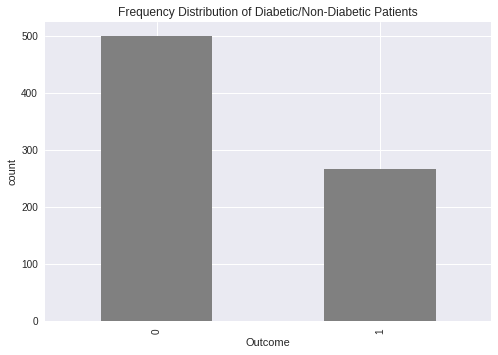

In [235]:
#Bar plot for the frequencies 
df['Outcome'].value_counts().plot(xlabel='Outcome', ylabel='count',color = 'Grey',kind ='bar', title = 'Frequency Distribution of Diabetic/Non-Diabetic Patients');

### 7. Correlation among variables 

In [236]:
df.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


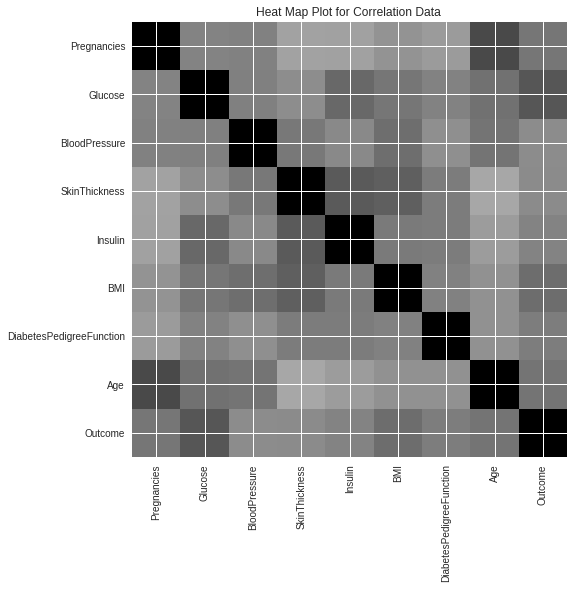

In [237]:
#Heatmap plot

fig, ax = plt.subplots(1,1 , figsize = (8,8))
im = ax.imshow(df.corr())
labels = df.corr().index
plt.xticks(range(0,len(df.corr().index)), df.corr(), rotation = 90)
plt.yticks(range(0,len(df.corr().columns)), df.corr().columns, rotation = 0)
plt.imshow(df.corr(), cmap='Greys', interpolation='nearest',vmax=1, vmin=-1, origin = 'upper')
plt.title('Heat Map Plot for Correlation Data ')
plt.show()

INFERENCE:

We have observed earlier that missing values in this dataset are represented by 0. This is clearly not a good practice and negatively impacts our data analysis. 



### 8. Replace the zero values with NAN

In [238]:
parameters = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

df[parameters] = df[parameters].replace(['0', 0], np.nan)


### 9. Variables with 0 value

In [239]:
(df == 0).sum()


Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

### 10. Missing Values

In [240]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### 11. Mean of each variable

In [241]:
df.mean()

Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

### 12. Replace missing values with Mean
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

In [242]:
for column in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
    df[column].fillna((df[column]).mean(), inplace = True)


#df['Glucose','BloodPressure','SkinThickness','Insulin','BMI'].fillna((df['Glucose','BloodPressure','SkinThickness','Insulin','BMI']).mean(),inplace = True)

In [243]:
#verifying the missing values are replaced with mean
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 13. Descriptive Statistics after dealing with missing values 

In [244]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [245]:
#Minimum Values
df.describe().min()

Pregnancies                  0.000000
Glucose                     30.435949
BloodPressure               12.096346
SkinThickness                7.000000
Insulin                     14.000000
BMI                          6.875151
DiabetesPedigreeFunction     0.078000
Age                         11.760232
Outcome                      0.000000
dtype: float64

**Inference: All the zeros has been replaced, as the minimum value is not showing any zeros for the changed columns**

In [246]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 15. Data Distribution Plot of each Independent Variable

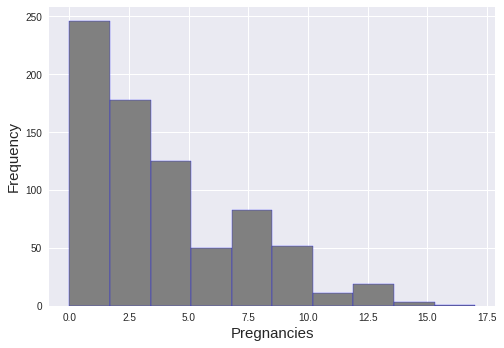

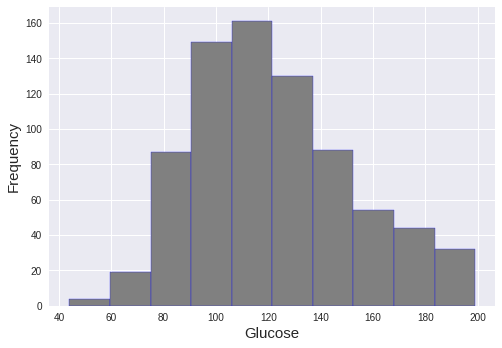

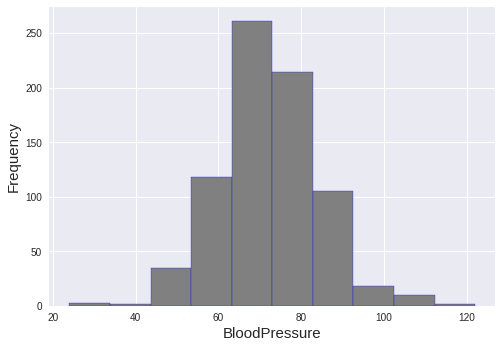

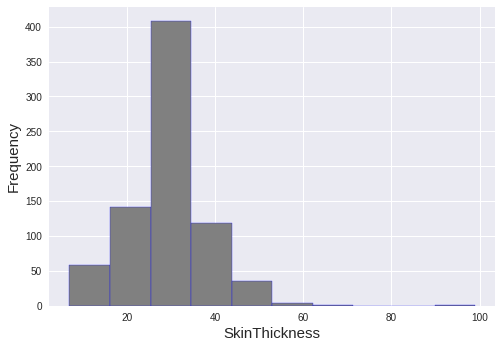

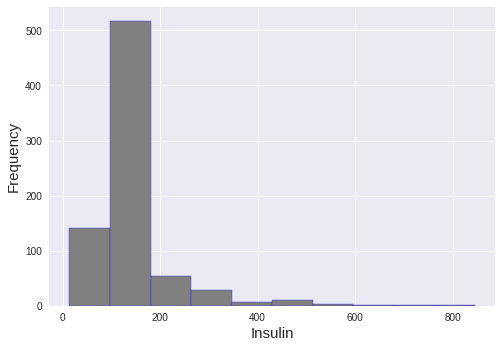

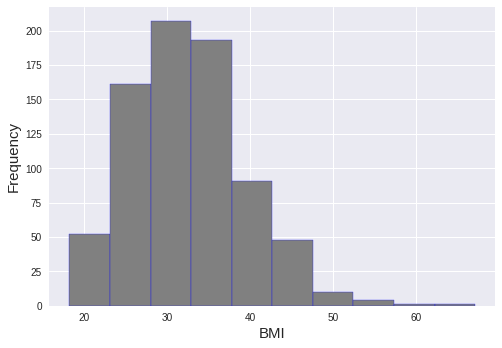

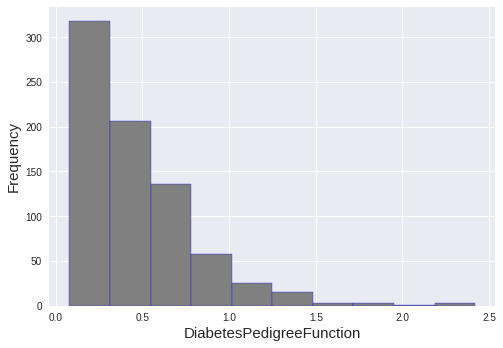

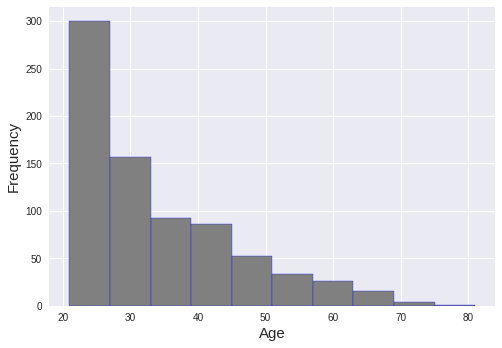

In [247]:
#plotting the histogram
for i, col in enumerate(df.columns[:-1]):
    plt.figure(i)
    plt.ylabel("Frequency", fontsize = 15)
    plt.xlabel(col, fontsize = 15)
    plt.hist(df[col], color= 'grey', edgecolor = 'b');
  

**My Inferences:**

The data distribution of each variable is explained by the means of above histograms.

For Pregnancy, the data is skewed towards the begining and then tapered to zero as the value increases. This is quite a normal phenomenon and is relatable.The Glucose variation shows a bell shaped curve with the maximum frequency around 100-125. The Blood Pressure value also follows the same pattern with the maximum around the value 75. These two variables shows a normal pattern as the highest point is near their normal levels of 120 and 80 for Glucose and BP respectively. 

The SkinThickness is another variable whose distribution was sharp at the center and then gradually decreasing. Whereas, the Insulin distribution shows a peak density around 150 and near zero distribution as the value increases.

The BMI variable shows slightly overweighted left side bell, while the DiabetesPedigree function is having high distribution initially and then reduces to zero as the value increases. Age also follows a similar pattern but with a change of values.


A Boxplot is a method for graphically depicting groups of numerical data through their quartiles. 

### 16. Boxplot for each variable

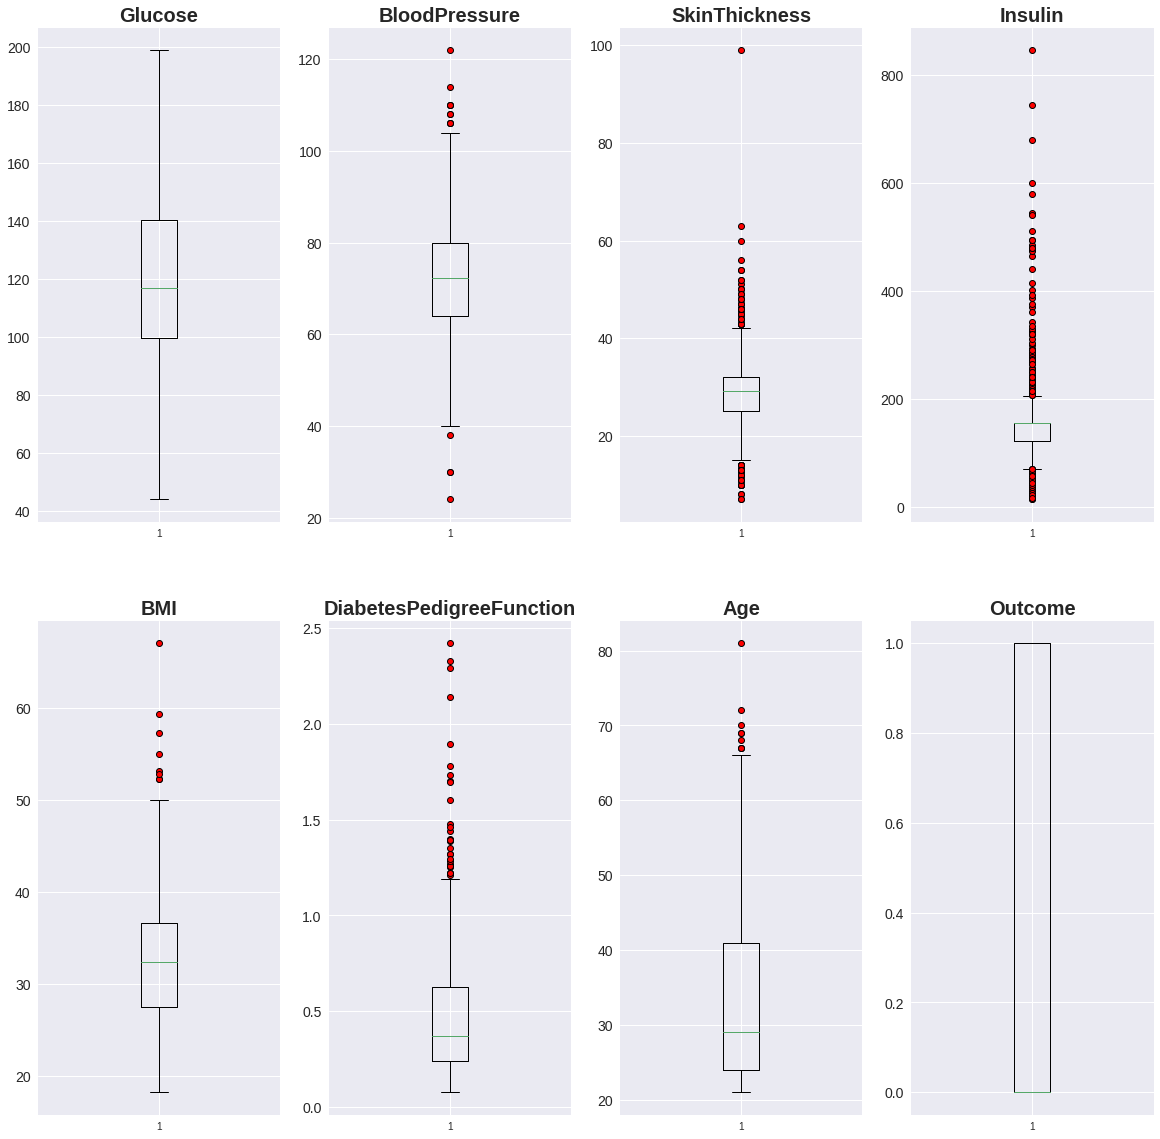

In [248]:
#plotting boxplot
properties = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'black')
fig, ax = plt.subplots(2, int(((len(df.columns)-1)/2)), figsize = (20, 20))

for i, ax in enumerate(ax.flat):
    ax.boxplot(df.iloc[:,i+1], flierprops =  properties)
    ax.set_title(df.columns[i+1], fontsize = 20, fontweight= 'bold')
    ax.tick_params(axis= 'y', labelsize = 14)
plt.tight_layout;
    

**Interpretation:**

The Glucose ditribution with a median around 120 shows an almost normal distribution , but with a small positive skew.The data is dispersed majorly between 100 and 140, which indicates a lesser dispersion whereas the maximum and minimum value shows a wider distribution with no outliers.

The BloodPressure distribution is normal with the data distribution majorly between the 60s and 80s. The presence of smaller number of outliers on both the sides of the plot are worth notable.

The skinthickness plot is slightly negatively skewed with large number of outliers on both the sides and the data is scattered majorly between 28 and 35.

The Insulin plot is completely negatively skewed with the median intersecting the third quartile. There are lot of outliers on both sides eventhough it is more above 200.

BMI almost follow the same pattern as of glucose but with some outliers. The ditribution looks almost normal.

The DiabetesPedigreeFunction is rightly skewed with large number of outliers on the upper side.

The Age is another plot with a right skew and the data scatter from the 20s and 40s and few outliers after that.

The Outcome follows completely positive or rightly skewed distribution with the median intersect the lower quartile.

### 17. Distribution of diabetics/nondiabetics across age variable

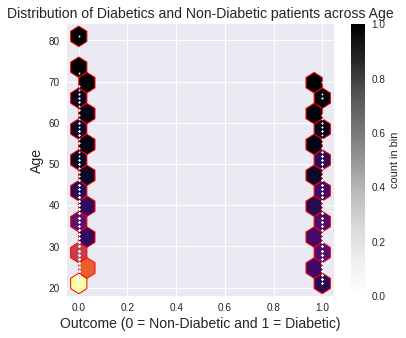

In [249]:
fig, ax = plt.subplots(1,1 , figsize = (6,5))
x = df['Outcome']
y = df['Age']
plt.hexbin(x, y, gridsize=15, mincnt=1, edgecolors="red", cmap="inferno")
plt.scatter(x,y, s=2, c="white")
cb = plt.colorbar(label='count in bin')
plt.xlabel('Outcome (0 = Non-Diabetic and 1 = Diabetic)',size = 14 )
plt.ylabel('Age', size = 14)
plt.title('Distribution of Diabetics and Non-Diabetic patients across Age', size = 14);


A better demographic distribution  of the data could be obtained by the violin and swarm plot using the seaborn library

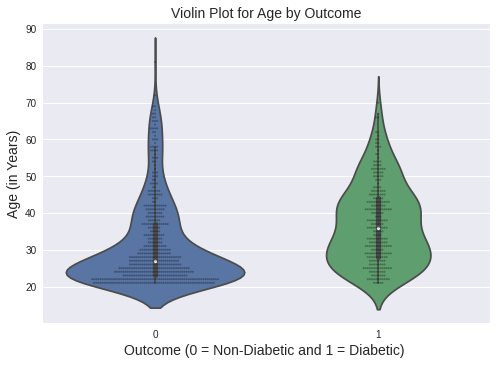

In [250]:
import seaborn as sns
sns.violinplot(x= "Outcome", y="Age", data= df);
sns.swarmplot(x="Outcome", y="Age", data=df, size=2, color = "k", alpha=0.3);
plt.title('Violin Plot for Age by Outcome', size = 14)
plt.ylabel('Age (in Years)', size = 14)
plt.xlabel('Outcome (0 = Non-Diabetic and 1 = Diabetic) ', size = 14);

### 18. Number of Pregnancies vs Diabetics

In [251]:
#Separate the Dataframe into positive and negative diabetics output
df_positive = df[df['Outcome']==1]
df_positive.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
6,3,78.0,50.0,32.00000,88.000000,31.0,0.248,26,1
8,2,197.0,70.0,45.00000,543.000000,30.5,0.158,53,1


In [252]:
df_negative = df[df['Outcome']==0]
df_negative.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.000000,29.00000,155.548223,26.6,0.351,31,0
3,1,89.0,66.000000,23.00000,94.000000,28.1,0.167,21,0
5,5,116.0,74.000000,29.15342,155.548223,25.6,0.201,30,0
7,10,115.0,72.405184,29.15342,155.548223,35.3,0.134,29,0
10,4,110.0,92.000000,29.15342,155.548223,37.6,0.191,30,0


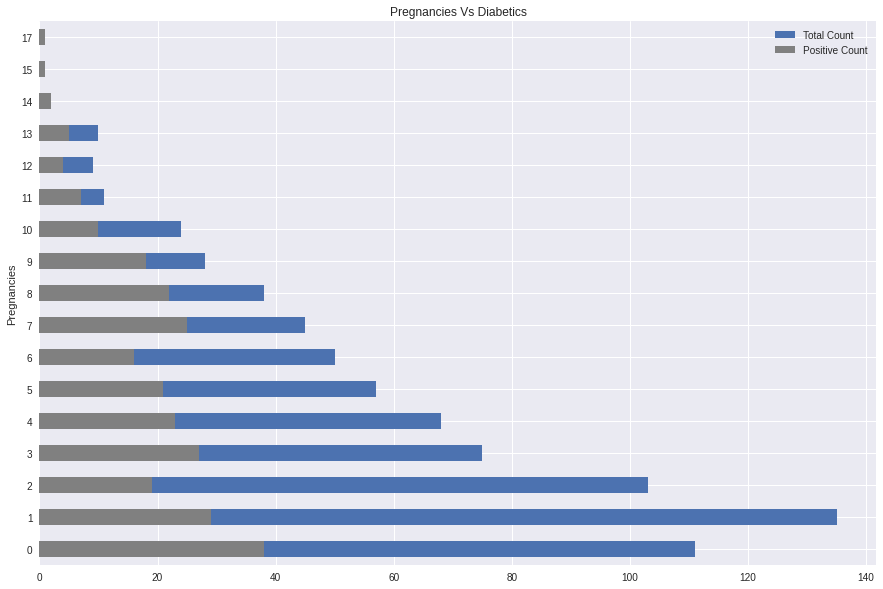

In [253]:
#plot the graph
fig, ax = plt.subplots(figsize = (15,10))
ax.set_title('Pregnancies Vs Diabetics')

#plot the  horizontal bargraph of count of Pregnancies by grouping the pregnancies column
df_pregnancy = pd.DataFrame(df.groupby('Pregnancies').size()).reset_index()
df_pregnancy.columns = ['Pregnancies', 'Total Count']

df_pregnancy.plot.barh(x = 'Pregnancies', y = 'Total Count', ax = ax)

#plot the horizontal bargraph of count of positive diabetics cases for the count of pregnancies

df_positive_pregnancy = pd.DataFrame(df_positive.groupby('Pregnancies').size()).reset_index()
df_positive_pregnancy.columns = ['Pregnancies', 'Positive Count']

df_positive_pregnancy.plot.barh(x = 'Pregnancies', y = 'Positive Count', ax = ax, color = 'grey');

**My Inference:**

Women having less number of pregnancies like 0, 1 etc have lower chances of testing Diabetics positive whereas, women who get pregnant more (between 7-13 ) have bigger chance of getting diabetics positive.


### 19. Outliers

In [254]:
QR1 = df.quantile(0.25)
QR3 = df.quantile(0.75)

IQR = QR3 - QR1
((df < (QR1 - 1.5 * IQR)) | (df > (QR3 + 1.5 * IQR))).any(axis=1)
    
#Print the IQR range 
print(IQR)

print('\n')
print("Outliers in the dataset : (True values in the below table)")
#The value where the "True" exist in below output is the outliers
(df < (QR1 - 1.5 * IQR)) | (df > (QR3 + 1.5 * IQR))

Pregnancies                  5.000000
Glucose                     40.500000
BloodPressure               16.000000
SkinThickness                7.000000
Insulin                     34.048223
BMI                          9.100000
DiabetesPedigreeFunction     0.382500
Age                         17.000000
Outcome                      1.000000
dtype: float64


Outliers in the dataset : (True values in the below table)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,True,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [255]:
#Remove the outliers( Datapoints outside 25% and 75% Quarters)
df = df[~((df < (QR1 - 1.5 * IQR)) | (df > (QR3 + 1.5 * IQR))).any(axis=1)]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,29.15342,155.548223,22.5,0.142,33,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [256]:
df.shape

(515, 9)

In [257]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,4.033010,120.213101,72.350235,28.749938,145.700301,31.878286,0.413765,33.535922,0.347573
std,3.282556,28.124549,10.677738,5.598732,25.754234,6.006902,0.248406,11.214575,0.476662
min,0.000000,44.000000,44.000000,15.000000,71.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,65.000000,27.000000,152.000000,27.600000,0.233000,24.000000,0.000000
50%,3.000000,116.000000,72.405184,29.153420,155.548223,32.000000,0.329000,30.000000,0.000000
75%,6.000000,137.000000,78.000000,30.000000,155.548223,35.450000,0.562500,41.000000,1.000000
max,13.000000,197.000000,104.000000,42.000000,205.000000,49.600000,1.191000,66.000000,1.000000


In [258]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,29.15342,155.548223,22.5,0.142,33,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


# Section 2 : Preprocessing

###  Import the values

In [259]:
#Import the values and separate into test and train
x = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values


In [260]:
#Separate the data into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Standard Scaler

In [261]:
#Apply standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train_copy = x_train
x_test_copy = x_test

In [262]:
x_train_copy.shape

(412, 8)

### PCA

In [263]:
#Apply PCA for dimensionality reduction - Let's find out how many variables to retain
from sklearn.decomposition import PCA
pca = PCA()
 
x_train_copy = pca.fit_transform(x_train)
x_test_copy = pca.transform(x_test)
 
explained_variance = pca.explained_variance_ratio_

### SCREE PLOT to identify the number of major components

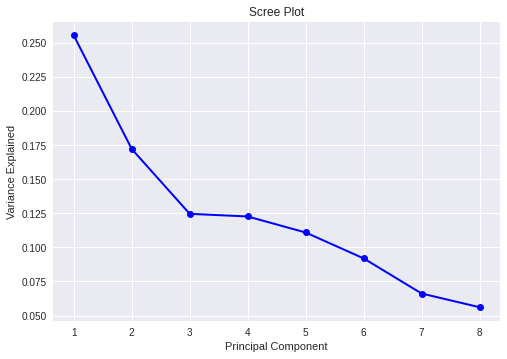

In [264]:
#Scree PLOT

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

INFERENCE:

From the Scree plot it is clear that there are only 3 variables contribute maximum to the output. Hence we can take n_Components = 3 and do the PCA for only the top 3

### PCA for Dimensionality Reduction

In [265]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 3)
 
x_train = pca.fit_transform(x_train)
x_test= pca.transform(x_test)
 
explained_variance = pca.explained_variance_ratio_

In [266]:
sum(explained_variance)

0.5522526887882631

### Plot of trained data

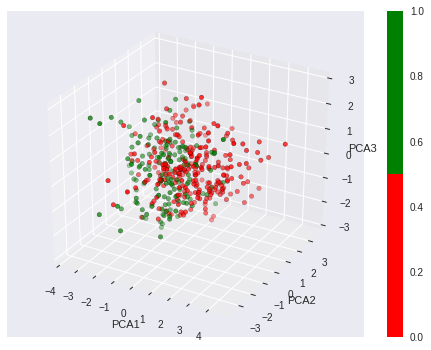

In [267]:
#Plotting the trained data
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

X_T = pd.DataFrame(x_train, columns = ['PCA1','PCA2','PCA3'])
x = X_T['PCA1']
y = X_T['PCA2']
z = X_T['PCA3']
c = y_train

img = ax.scatter(x, y, z, c=c,edgecolors='black', cmap = ListedColormap(('red', 'green',)) )

fig.colorbar(img)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.show()

# Section 3: Various Models

### Logistic Regression

In [268]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(solver='lbfgs', max_iter=7600)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=7600)

In [269]:
y_pred_lr = lr_model.predict(x_test)

### Support Vector Classifier

In [270]:
from sklearn.svm import SVC
svc_model = SVC(probability=True)
#clf=svm.SVC(probability=True)
svc_model.fit(x_train, y_train)

SVC(probability=True)

In [271]:
y_pred_svc = svc_model.predict(x_test)

###Naive Bayes

In [272]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [273]:
y_pred_nb = nb_model.predict(x_test)

### K-Nearest Neighbors

In [274]:
from sklearn import neighbors
knn_model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
# fitting model
knn_model.fit(x_train,y_train)
# making predictions
y_pred_knn = knn_model.predict(x_test)

### Decision Tree

In [275]:
from sklearn.tree import DecisionTreeClassifier

dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [276]:
y_pred_dtc = dtc_model.predict(x_test)

### Random Forest

In [277]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=200)
rfc_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [278]:
y_pred_rfc = rfc_model.predict(x_test)


# **Section 4. Comparison**

## Accuracy Score

In [279]:
from sklearn import metrics
print("ACCURACY SCORE COMPARISON OF VARIOUS METHODS")
print("Accuracy_Score of  Logistic Regression =", format(metrics.accuracy_score(y_test, y_pred_lr)))
print("Accuracy_Score of  Support Vector Machine =", format(metrics.accuracy_score(y_test, y_pred_svc)))
print("Accuracy_Score of  Decision Tree =", format(metrics.accuracy_score(y_test, y_pred_dtc)))
print("Accuracy_Score of  Naive Bayes =", format(metrics.accuracy_score(y_test, y_pred_nb)))
print("Accuracy_Score of  K-Nearest Neighbors =", format(metrics.accuracy_score(y_test, y_pred_knn)))
print("Accuracy_Score of  Random Forest =", format(metrics.accuracy_score(y_test, y_pred_rfc)))

ACCURACY SCORE COMPARISON OF VARIOUS METHODS
Accuracy_Score of  Logistic Regression = 0.8155339805825242
Accuracy_Score of  Support Vector Machine = 0.7669902912621359
Accuracy_Score of  Decision Tree = 0.7378640776699029
Accuracy_Score of  Naive Bayes = 0.7961165048543689
Accuracy_Score of  K-Nearest Neighbors = 0.7378640776699029
Accuracy_Score of  Random Forest = 0.7475728155339806


In [280]:
accuracy_lr = metrics.accuracy_score(y_test, y_pred_lr)
accuracy_svc = metrics.accuracy_score(y_test, y_pred_svc)
accuracy_dtc = metrics.accuracy_score(y_test, y_pred_dtc)
accuracy_nb = metrics.accuracy_score(y_test, y_pred_nb)
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
accuracy_rfc = metrics.accuracy_score(y_test, y_pred_rfc)

INFERENCE:

The model with highest accuracy in testing is Logistic Regression

## Confusion Matrix

In [281]:
from sklearn.metrics import classification_report, confusion_matrix

In [282]:
#Calculate the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_svc = confusion_matrix(y_test, y_pred_svc)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)


print("Logistic Regression Confusion Matrix:")
print(cm_lr)
print("Support Vector Machine Confusion Matrix:")
print(cm_svc)

print("Decision Tree Confusion Matrix:")
print(cm_dtc)
print("Naive Bayes Confusion Matrix:")
print(cm_nb)

print("K-Nearest Neighbors Confusion Matrix:")
print(cm_knn)
print("Random Forest Confusion Matrix:")
print(cm_rfc)

Logistic Regression Confusion Matrix:
[[65 11]
 [ 8 19]]
Support Vector Machine Confusion Matrix:
[[62 14]
 [10 17]]
Decision Tree Confusion Matrix:
[[56 20]
 [ 7 20]]
Naive Bayes Confusion Matrix:
[[63 13]
 [ 8 19]]
K-Nearest Neighbors Confusion Matrix:
[[57 19]
 [ 8 19]]
Random Forest Confusion Matrix:
[[60 16]
 [10 17]]


## Classification Report

In [283]:
#Calculate the classification Report
cr_lr = classification_report(y_test, y_pred_lr)
cr_svc = classification_report(y_test, y_pred_svc)
cr_dtc = classification_report(y_test, y_pred_dtc)
cr_nb = classification_report(y_test, y_pred_nb)
cr_knn = classification_report(y_test, y_pred_knn)
cr_rfc = classification_report(y_test, y_pred_rfc)




print("Logistic Regression Classification Report:")
print(cr_lr)
print("Support Vector Machine Classification Report:")
print(cr_svc)

print("Decision Tree Classification Report:")
print(cr_dtc)
print("Naive Bayes Classification Report:")
print(cr_nb)

print("K-Nearest Neighbors Classification Report:")
print(cr_knn)
print("Random Forest Classification Report:")
print(cr_rfc)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        76
           1       0.63      0.70      0.67        27

    accuracy                           0.82       103
   macro avg       0.76      0.78      0.77       103
weighted avg       0.82      0.82      0.82       103

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        76
           1       0.55      0.63      0.59        27

    accuracy                           0.77       103
   macro avg       0.70      0.72      0.71       103
weighted avg       0.78      0.77      0.77       103

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81        76
           1       0.50      0.74      0.60        27

    accuracy                           0.74       103
  

## Specificity, Sensitivity

In [284]:
#Function to calculate the specificity and Sensitivity
def specificity_sensitivityCalc(cm):
  total = sum(sum(cm))
  accuracy = (cm[0,0] + cm[1,1])/total
  sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
  specificity = cm[1,1]/(cm[1,0]+cm[1,1])
  return sensitivity,specificity

In [285]:
sensitivity_lr, specificity_lr = specificity_sensitivityCalc(cm_lr)
sensitivity_svc, specificity_svc = specificity_sensitivityCalc(cm_svc)
sensitivity_dtc, specificity_dtc = specificity_sensitivityCalc(cm_dtc)
sensitivity_nb, specificity_nb = specificity_sensitivityCalc(cm_nb)
sensitivity_knn, specificity_knn = specificity_sensitivityCalc(cm_knn)
sensitivity_rfc, specificity_rfc = specificity_sensitivityCalc(cm_rfc)


print("SENSITIVITY COMPARISON:")

print("Sensitivity of Logistic Regression Model: ",sensitivity_lr)
print("Sensitivity of Support Vector Classifier: ",sensitivity_svc)
print("Sensitivity of Decision Tree Classifier: ",sensitivity_dtc)
print("Sensitivity of Naive Bayes Model: ",sensitivity_nb)
print("Sensitivity of k-Nearest Neighbors: ",sensitivity_knn)
print("Sensitivity of Random Forest Classifier: ",sensitivity_rfc)

print("SPECIFICITY COMPARISON:")


print("Specificity of Logistic Regression Model: ",specificity_lr)
print("Specificity of Support Vector Classifier: ",specificity_svc)
print("Specificity of Decision Tree Classifier: ",specificity_dtc)
print("Specificity of Naive Bayes Model: ",specificity_nb)
print("Specificity of k-Nearest Neighbors: ",specificity_knn)
print("Specificity of Random Forest Classifier: ",specificity_rfc)



SENSITIVITY COMPARISON:
Sensitivity of Logistic Regression Model:  0.8552631578947368
Sensitivity of Support Vector Classifier:  0.8157894736842105
Sensitivity of Decision Tree Classifier:  0.7368421052631579
Sensitivity of Naive Bayes Model:  0.8289473684210527
Sensitivity of k-Nearest Neighbors:  0.75
Sensitivity of Random Forest Classifier:  0.7894736842105263
SPECIFICITY COMPARISON:
Specificity of Logistic Regression Model:  0.7037037037037037
Specificity of Support Vector Classifier:  0.6296296296296297
Specificity of Decision Tree Classifier:  0.7407407407407407
Specificity of Naive Bayes Model:  0.7037037037037037
Specificity of k-Nearest Neighbors:  0.7037037037037037
Specificity of Random Forest Classifier:  0.6296296296296297


## Receiver Operating Characteristic (ROC)curve

In [286]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [287]:
lr_pred_proba = lr_model.predict_proba(x_test)[::,1]
svc_pred_proba = svc_model.predict_proba(x_test)[::,1]
dtc_pred_proba = dtc_model.predict_proba(x_test)[::,1]
nb_pred_proba = nb_model.predict_proba(x_test)[::,1]
knn_pred_proba = knn_model.predict_proba(x_test)[::,1]
rfc_pred_proba = rfc_model.predict_proba(x_test)[::,1]


In [288]:
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test,  lr_pred_proba)
fpr_svc, tpr_svc, _ = metrics.roc_curve(y_test,  svc_pred_proba)
fpr_dtc, tpr_dtc, _ = metrics.roc_curve(y_test,  dtc_pred_proba)
fpr_nb, tpr_nb, _ = metrics.roc_curve(y_test,  nb_pred_proba)
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test,  knn_pred_proba)
fpr_rfc, tpr_rfc, _ = metrics.roc_curve(y_test,  rfc_pred_proba)


In [289]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


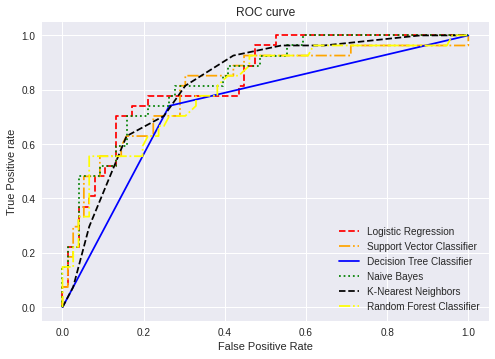

In [290]:
plt.plot(fpr_lr, tpr_lr, linestyle='--',color='red', label='Logistic Regression')
plt.plot(fpr_svc, tpr_svc, linestyle='-.',color='orange', label='Support Vector Classifier')
plt.plot(fpr_dtc, tpr_dtc, linestyle='-',color='blue', label='Decision Tree Classifier')
plt.plot(fpr_nb, tpr_nb, linestyle=':',color='green', label='Naive Bayes')
plt.plot(fpr_knn, tpr_knn, linestyle='dashed',color='black', label='K-Nearest Neighbors')
plt.plot(fpr_rfc, tpr_rfc, linestyle='dashdot',color='yellow', label='Random Forest Classifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Precision recall curve

In [291]:
from sklearn.metrics import precision_recall_curve

In [292]:
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, lr_pred_proba)
precision_svc, recall_svc, thresholds_svc = precision_recall_curve(y_test, svc_pred_proba)
precision_dtc, recall_dtc, thresholds_dtc = precision_recall_curve(y_test, dtc_pred_proba)
precision_nb, recall_nb, thresholds_nb = precision_recall_curve(y_test, nb_pred_proba)
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test, knn_pred_proba)
precision_rfc, recall_rfc, thresholds_rfc = precision_recall_curve(y_test, rfc_pred_proba)



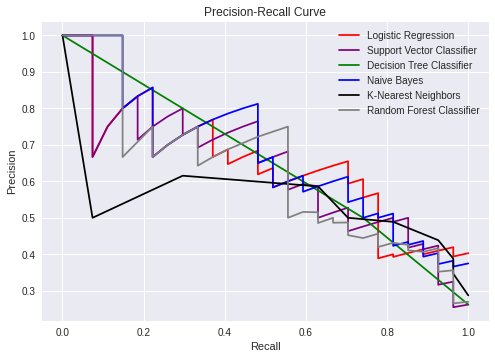

In [293]:
fig, ax = plt.subplots()
ax.plot(recall_lr, precision_lr, color='red',label='Logistic Regression')
ax.plot(recall_svc, precision_svc, color='purple',label='Support Vector Classifier')
ax.plot(recall_dtc, precision_dtc, color='green',label='Decision Tree Classifier')
ax.plot(recall_nb, precision_nb, color='blue',label='Naive Bayes')
ax.plot(recall_knn, precision_knn, color='black',label='K-Nearest Neighbors')
ax.plot(recall_rfc, precision_rfc, color='grey',label='Random Forest Classifier')
#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.legend(loc='best')
#display plot
plt.show()


## AUC Value

In [294]:
auc_lr = metrics.roc_auc_score(y_test, lr_pred_proba )
auc_svc = metrics.roc_auc_score(y_test, svc_pred_proba)
auc_dtc = metrics.roc_auc_score(y_test, dtc_pred_proba)
auc_nb = metrics.roc_auc_score(y_test, nb_pred_proba )
auc_knn = metrics.roc_auc_score(y_test, knn_pred_proba)
auc_rfc = metrics.roc_auc_score(y_test, rfc_pred_proba)


## F1 Score

In [295]:
from sklearn.metrics import f1_score

In [296]:
f1_score_lr = f1_score(y_test, y_pred_lr,average='weighted')
f1_score_svc = f1_score(y_test, y_pred_svc,average='weighted')
f1_score_dtc = f1_score(y_test, y_pred_dtc,average='weighted')
f1_score_nb = f1_score(y_test, y_pred_nb,average='weighted')
f1_score_knn = f1_score(y_test, y_pred_knn,average='weighted')
f1_score_rfc = f1_score(y_test, y_pred_rfc,average='weighted')


## Comparison Matrix

In [310]:
sensitivity = [sensitivity_lr,sensitivity_svc,sensitivity_dtc,sensitivity_nb,sensitivity_knn,sensitivity_rfc]
specificity = [specificity_lr,specificity_svc,specificity_dtc,specificity_nb,specificity_knn,specificity_rfc]
accuracy = [accuracy_lr,accuracy_svc,accuracy_dtc,accuracy_nb,accuracy_knn,accuracy_rfc]
auc_values = [auc_lr,auc_svc,auc_dtc, auc_nb, auc_knn,auc_rfc ]
f1_score_values = [f1_score_lr,f1_score_svc, f1_score_dtc, f1_score_nb, f1_score_knn,f1_score_rfc ]



In [311]:
models = ['Logistic Regression','Support Vector Classifier','Decision Tree Classifier','Naive Bayes','K-Nearest Neighbors', 'Random Forest CLassisifier']
list_values = [models,sensitivity, specificity, accuracy,auc_values, f1_score_values]
Comparison_Matrix = pd.DataFrame(list_values).transpose()
Comparison_Matrix.columns = ['Models','Sensitivity','Specificity','Accuracy','AUC Values', 'F1 Score Values']
Comparison_Matrix= Comparison_Matrix.set_index("Models" ,drop=True)
Comparison_Matrix


,Sensitivity,Specificity,Accuracy,AUC Values,F1 Score Values
Models,,,,,
Logistic Regression,0.855263,0.703704,0.815534,0.837719,0.818531
Support Vector Classifier,0.815789,0.62963,0.76699,0.813109,0.771876
Decision Tree Classifier,0.736842,0.740741,0.737864,0.738791,0.751037
Naive Bayes,0.828947,0.703704,0.796117,0.840156,0.801288
K-Nearest Neighbors,0.75,0.703704,0.737864,0.819444,0.74982
Random Forest CLassisifier,0.789474,0.62963,0.747573,0.801657,0.755007


## Plot the Comparison Matrix

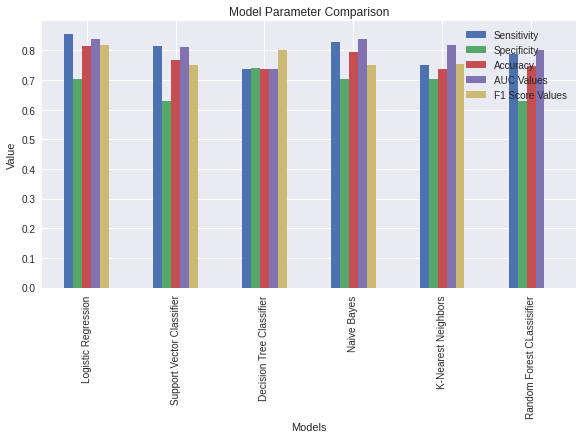

In [299]:
#Plot Comparison Matrix
Comparison_Matrix.plot.bar(figsize=(8, 6))
plt.tight_layout()
plt.title('Model Parameter Comparison')
plt.xlabel('Models')
plt.ylabel('Value')
plt.show()

# Section 5: Deciding the final model

From various matrices accuracy, sensitivity, specificity comparison Logistic Regression is the best suited model for the diabetes data prediction. But the AUC vakue of Naive Bayes is more than that of the Logistic Regression. Hence I am taking that model as my prediction system.

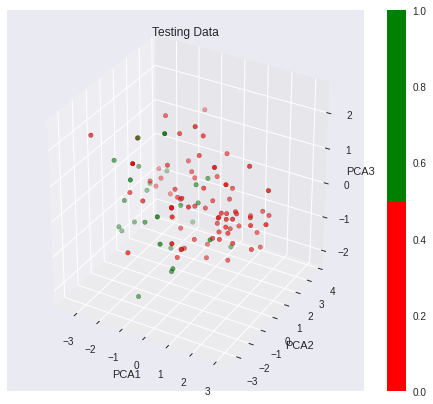

In [300]:
#Plotting the tested data
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection='3d')

X_T = pd.DataFrame(x_test, columns = ['PCA1','PCA2','PCA3'])
x = X_T['PCA1']
y = X_T['PCA2']
z = X_T['PCA3']
c = y_test

img = ax.scatter(x, y, z, c=c,edgecolors='black', cmap = ListedColormap(('red', 'green',)) )

fig.colorbar(img)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title('Testing Data')
plt.show()

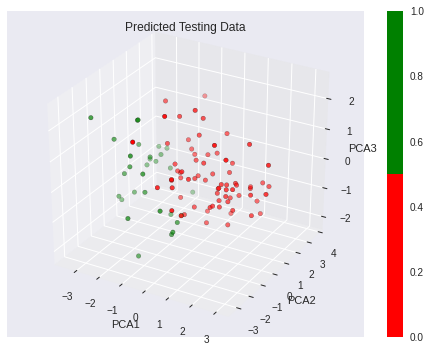

In [301]:

#Plotting the tested data
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

X_T = pd.DataFrame(x_test, columns = ['PCA1','PCA2','PCA3'])
x = X_T['PCA1']
y = X_T['PCA2']
z = X_T['PCA3']
c = y_pred_lr

img = ax.scatter(x, y, z, c=c,edgecolors='black', cmap = ListedColormap(('red', 'green',)) )

fig.colorbar(img)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title('Predicted Testing Data')
plt.show()

# Section 6: Prediction System

In [302]:
test_values = np.array([0,105,64,41,142,41.5,0.173,22])

In [303]:
#Apply Standard Scaler
test_values_train = sc.fit_transform(test_values[:, np.newaxis])

In [304]:
#test_values_train = [[test_values_train]]
test_values_train

array([[-1.10858276],
       [ 1.13166262],
       [ 0.25690014],
       [-0.23382028],
       [ 1.92108242],
       [-0.22315244],
       [-1.10489168],
       [-0.63919801]])

In [305]:
test_values_train = test_values_train.reshape(1, -1)

In [306]:
#Apply PCA
test_values_train = pca.transform(test_values_train)

In [307]:
#Prediction
y_pred_lr_final = lr_model.predict(test_values_train)

In [308]:
print('Predicted Class: %d' % y_pred_lr_final)

Predicted Class: 1


In [309]:
#Final Outcome:
if y_pred_lr_final == 0:
  print("Non-DIABETIC")
else:
  print("DIABETIC")


DIABETIC


# ***!!!!!THANK YOU!!!!!***